## Extract Social responsiveness scale data for the Q1K project

In [112]:
# Import modules

import os
import pandas as pd
from pathlib import Path
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import missingno as msno



In [113]:
# Select date
date="2025_05_20"
files_date="2025_05_20"

In [121]:
## Import all csv SRS files 

# Based on glob find all files that have SRS label in the name  
srs_files = glob.glob(f'../source/clinical/srs/{date}/*SRS*.csv')
srs_df= pd.read_csv(srs_files[0])

In [122]:
srs_df.columns

Index(['record_id', 'redcap_event_name', 'q1k_proband_id_1',
       'q1k_proband_yn_1', 'q1k_relative_idgenerated_1', 'ev_status',
       'enr2_pro_sex', 'p3_q1k_selfconsent_1', 'enr2_pro_age_calc_2',
       'srs_prescho_age_2', 'srsps2rs_score_awr_v2', 'srsps2rs_tscore_awr_v2',
       'srsps2rs_score_cog_v2', 'srsps2rs_tscore_cog_v2',
       'srsps2rs_score_com_v2', 'srsps2rs_tscore_com_v2',
       'srsps2rs_score_mot_v2', 'srsps2rs_tscore_mot_v2',
       'srsps2rs_score_rrb_v2', 'srsps2rs_tscore_rrb_v2',
       'srsps2rs_score_sci_v2', 'srsps2rs_tscore_sci_v2',
       'srsps2rs_total_raw_score_v2', 'srsps2rs_total_tscore_v2',
       'srs4_18_age2', 'srs2sch_raw_score_awr_v2', 'srs2sch_tscore_awr_v2',
       'srs2sch_tscore_awr_v3', 'srs2sch_raw_score_cog_v2',
       'srs2sch_tscore_cog_v2', 'srs2sch_tscore_cog_v3',
       'srs2sch_raw_score_com_v2', 'srs2sch_tscore_com_v2',
       'srs2sch_tscore_com_v3', 'srs2sch_raw_score_mot_v2',
       'srs2sch_tscore_mot_v2', 'srs2sch_tscore_mot

In [123]:
### Merge all rows with the same ID to have one row per participant
srs_df = srs_df.groupby('record_id', as_index=False).first()  

In [124]:
srs_df

,record_id,redcap_event_name,q1k_proband_id_1,q1k_proband_yn_1,q1k_relative_idgenerated_1,ev_status,enr2_pro_sex,p3_q1k_selfconsent_1,enr2_pro_age_calc_2,srs_prescho_age_2,...,srs2adoth_score_com_v2,srs2adoth_tscore_com_v2,srs2adoth_score_mot_v2,srs2adoth_tscore_mot_v2,srs2adoth_score_rrb_v2,srs2adoth_tscore_rrb_v2,srs2adoth_score_sci_v2,srs2adoth_tscore_sci_v2,srs2adoth_total_score_v2,srs2adoth_total_tscore_v2
0,100,intake_arm_1,Q1K_HSJ_100100_P,1.0,None,NaN,1.0,NaN,6.499905,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,intake_arm_1,None,0.0,Q1K_HSJ_100100_S1,1.0,2.0,NaN,3.293816,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,intake_arm_1,None,0.0,Q1K_HSJ_100100_M1,2.0,1.0,NaN,26.869819,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,intake_arm_1,None,0.0,Q1K_HSJ_100100_F1,1.0,2.0,NaN,30.059481,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,intake_arm_1,Q1K_HSJ_100104_P,1.0,None,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,94,intake_arm_1,None,0.0,Q1K_HSJ_10093_M1,1.0,1.0,NaN,27.970458,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,95,intake_arm_1,None,0.0,Q1K_HSJ_10093_O1,2.0,1.0,NaN,56.899183,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,97,intake_arm_1,Q1K_HSJ_10097_P,1.0,None,NaN,2.0,NaN,7.964571,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,98,intake_arm_1,None,0.0,Q1K_HSJ_10097_M1,2.0,1.0,NaN,37.835137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# Drop unnecessary columns
columns_to_drop = ['redcap_event_name']
srs_df.drop(columns=columns_to_drop, inplace=True)

### Merge ID columns

In [126]:
# Select ID columns to merge
id_columns= ['q1k_proband_id_1','q1k_relative_idgenerated_1']

# Create a new column 'q1k_id' by merging the values from the two columns
srs_df['q1k_id'] = srs_df[id_columns].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

# Drop the original columns
srs_df.drop(columns=id_columns, inplace=True)


### Merge age columns

In [127]:
# Select age columns
age_columns = ['srs_prescho_age_2',
 'srs4_18_age2',
 'srs_asr_age_p3',
 'srs_older_age2']
# Create a new column 'srs_age' by merging the values from the all columns
srs_df['srs_age'] = srs_df[age_columns].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

### Create column for which SRS was used


In [131]:
# If value in srs_prescho_age_2, then it should say "SRS preschool"
# If value in srs4_18_age2, then it should say "SRS 4-18"
# If value in srs_asr_age_p3, then it should say "SRS Adult Self Report"
# If value in srs_older_age2, then it should say "SRS other Relative"
srs_df['srs_questionnaire'] = np.where(
    srs_df['srs_prescho_age_2'].notnull(), 'SRS preschool',
    np.where(
        srs_df['srs4_18_age2'].notnull(), 'SRS 4-18',
        np.where(
            srs_df['srs_asr_age_p3'].notnull(), 'SRS Adult Self Report',
            np.where(
                srs_df['srs_older_age2'].notnull(), 'SRS other Relative',
                'Unknown'
            )
        )
    )
)

# If values in srs questionnaire is unknown, then grab information from other srs variables,
# If value in srsps2rs_score_awr_v2, not null, then it should say "SRS preschool"
# If value in srs2_sch_total_raw_score_v2, not null, then it should say "SRS 4-18"
# If value in srs2adself_score_sci_v2, not null, then it should say "SRS Adult Self Report"
# If value in srs2adoth_score_cog_v2, not null, then it should say "SRS other Relative"
srs_df['srs_questionnaire'] = np.where(
    srs_df['srs_questionnaire'] == 'Unknown',
    np.where(
        srs_df['srsps2rs_score_awr_v2'].notnull(), 'SRS preschool',
        np.where(
            srs_df['srs2_sch_total_raw_score_v2'].notnull(), 'SRS 4-18',
            np.where(
                srs_df['srs2adself_score_sci_v2'].notnull(), 'SRS Adult Self Report',
                np.where(
                    srs_df['srs2adoth_score_cog_v2'].notnull(), 'SRS other Relative',
                    ""
                )
            )
        )
    ),
    srs_df['srs_questionnaire']
)

# Drop age columns
srs_df.drop(columns=age_columns, inplace=True)

## Merge the different raw and t-score columns

In [132]:
# Create a dictionnary mapping of column names to their types and categories
srs_column_mapping = {
    # Raw scores
    'srsps2rs_score_awr_v2': {'type': 'raw', 'category': 'awareness'},
    'srsps2rs_score_cog_v2': {'type': 'raw', 'category': 'cognition'},
    'srsps2rs_score_com_v2': {'type': 'raw', 'category': 'communication'},
    'srsps2rs_score_mot_v2': {'type': 'raw', 'category': 'motivation'},
    'srsps2rs_score_rrb_v2': {'type': 'raw', 'category': 'restricted_interests'},
    'srsps2rs_score_sci_v2': {'type': 'raw', 'category': 'sci'},
    'srsps2rs_total_raw_score_v2': {'type': 'raw', 'category': 'total'},
    
    'srs2sch_raw_score_awr_v2': {'type': 'raw', 'category': 'awareness'},
    'srs2sch_raw_score_cog_v2': {'type': 'raw', 'category': 'cognition'},
    'srs2sch_raw_score_com_v2': {'type': 'raw', 'category': 'communication'},
    'srs2sch_raw_score_mot_v2': {'type': 'raw', 'category': 'motivation'},
    'srs2sch_raw_score_rrb_v2': {'type': 'raw', 'category': 'restricted_interests'},
    'srs2sch_score_sci_v2': {'type': 'raw', 'category': 'sci'},
    'srs2_sch_total_raw_score_v2': {'type': 'raw', 'category': 'total'},
    
    'srs2adself_score_awr_v2': {'type': 'raw', 'category': 'awareness'},
    'srs2adself_score_cog_v2': {'type': 'raw', 'category': 'cognition'},
    'srs2adself_score_com_v2': {'type': 'raw', 'category': 'communication'},
    'srs2adself_score_mot_v2': {'type': 'raw', 'category': 'motivation'},
    'srs2adself_score_rrb_v2': {'type': 'raw', 'category': 'restricted_interests'},
    'srs2adself_score_sci_v2': {'type': 'raw', 'category': 'sci'},
    'srs_2_adult_self_report_to': {'type': 'raw', 'category': 'total'},
    
    'srs2adoth_score_awr_v2': {'type': 'raw', 'category': 'awareness'},
    'srs2adoth_score_cog_v2': {'type': 'raw', 'category': 'cognition'},
    'srs2adoth_score_com_v2': {'type': 'raw', 'category': 'communication'},
    'srs2adoth_score_mot_v2': {'type': 'raw', 'category': 'motivation'},
    'srs2adoth_score_rrb_v2': {'type': 'raw', 'category': 'restricted_interests'},
    'srs2adoth_score_sci_v2': {'type': 'raw', 'category': 'sci'},
    'srs2adoth_total_score_v2': {'type': 'raw', 'category': 'total'},
    
    # T-scores
    'srsps2rs_tscore_awr_v2': {'type': 'tscore', 'category': 'awareness'},
    'srsps2rs_tscore_cog_v2': {'type': 'tscore', 'category': 'cognition'},
    'srsps2rs_tscore_com_v2': {'type': 'tscore', 'category': 'communication'},
    'srsps2rs_tscore_mot_v2': {'type': 'tscore', 'category': 'motivation'},
    'srsps2rs_tscore_rrb_v2': {'type': 'tscore', 'category': 'restricted_interests'},
    'srsps2rs_tscore_sci_v2': {'type': 'tscore', 'category': 'sci'},
    'srsps2rs_total_tscore_v2': {'type': 'tscore', 'category': 'total'},
    
    'srs2sch_tscore_awr_v2': {'type': 'tscore', 'category': 'awareness'},
    'srs2sch_tscore_awr_v3': {'type': 'tscore', 'category': 'awareness'},
    'srs2sch_tscore_cog_v2': {'type': 'tscore', 'category': 'cognition'},
    'srs2sch_tscore_cog_v3': {'type': 'tscore', 'category': 'cognition'},
    'srs2sch_tscore_com_v2': {'type': 'tscore', 'category': 'communication'},
    'srs2sch_tscore_com_v3': {'type': 'tscore', 'category': 'communication'},
    'srs2sch_tscore_mot_v2': {'type': 'tscore', 'category': 'motivation'},
    'srs2sch_tscore_mot_v3': {'type': 'tscore', 'category': 'motivation'},
    'srs2sch_tscore_rrb_v2': {'type': 'tscore', 'category': 'restricted_interests'},
    'srs2sch_tscore_rrb_v3': {'type': 'tscore', 'category': 'restricted_interests'},
    'srs2sch_tscore_sci_v2': {'type': 'tscore', 'category': 'sci'},
    'srs2sch_tscore_sci_v3': {'type': 'tscore', 'category': 'sci'},
    'srs2_sch_total_t_score_v2': {'type': 'tscore', 'category': 'total'},
    'srs2_sch_total_t_score_v3': {'type': 'tscore', 'category': 'total'},
    
    'srs2adself_tscore_awr_v2': {'type': 'tscore', 'category': 'awareness'},
    'srs2adself_tscore_cog_v2': {'type': 'tscore', 'category': 'cognition'},
    'srs2adself_tscore_com_v2': {'type': 'tscore', 'category': 'communication'},
    'srs2adself_tscore_mot_v2': {'type': 'tscore', 'category': 'motivation'},
    'srs2adself_tscore_rrb_v2': {'type': 'tscore', 'category': 'restricted_interests'},
    'srs2adself_tscore_sci_v2': {'type': 'tscore', 'category': 'sci'},
    'srs2adself_total_tscore_v2': {'type': 'tscore', 'category': 'total'},
    
    'srs2adoth_tscore_awr_v2': {'type': 'tscore', 'category': 'awareness'},
    'srs2adoth_tscore_cog_v2': {'type': 'tscore', 'category': 'cognition'},
    'srs2adoth_tscore_com_v2': {'type': 'tscore', 'category': 'communication'},
    'srs2adoth_tscore_mot_v2': {'type': 'tscore', 'category': 'motivation'},
    'srs2adoth_tscore_rrb_v2': {'type': 'tscore', 'category': 'restricted_interests'},
    'srs2adoth_tscore_sci_v2': {'type': 'tscore', 'category': 'sci'},
    'srs2adoth_total_tscore_v2': {'type': 'tscore', 'category': 'total'}
}


In [133]:
def process_srs_scores(srs_df):
    # Create empty columns for the consolidated scores
    consolidated_columns = [
        'raw_awareness', 'raw_cognition', 'raw_communication', 
        'raw_motivation', 'raw_restricted_interests', 'raw_total',
        'tscore_awareness', 'tscore_cognition', 'tscore_communication', 
        'tscore_motivation', 'tscore_restricted_interests', 'tscore_total'
    ]
    
    # Add the new columns to the dataframe
    for col in consolidated_columns:
        if col not in srs_df.columns:
            srs_df[col] = None
    
    # Process each subject
    for subject in srs_df.record_id:
        # Initialize dictionaries to store values and prioritize newer versions
        raw_scores = {}
        tscores = {}
        
        # First pass - collect all values available for this subject
        for column in srs_df.columns:
            if column in srs_column_mapping:
                value = srs_df.loc[srs_df.record_id == subject, column].values[0]
                
                # Skip if value is null
                if pd.isnull(value):
                    continue
                
                score_type = srs_column_mapping[column]['type']
                category = srs_column_mapping[column]['category']
                
                
                # Determine version from column name
                version = "v2"  # Default
                if "v3" in column:
                    version = "v3"
                
                # Store with version info for prioritization
                if score_type == 'raw':
                    # For raw scores, store the value and source info
                    if category not in raw_scores or version > raw_scores[category]['version']:
                        raw_scores[category] = {'value': value, 'version': version, 'source': column}
                elif score_type == 'tscore':
                    # For t-scores, store the value and source info
                    if category not in tscores or version > tscores[category]['version']:
                        tscores[category] = {'value': value, 'version': version, 'source': column}
        
        # Second pass - assign the values to the consolidated columns
        for category, data in raw_scores.items():
            consolidated_column = f'raw_{category}'
            if consolidated_column in consolidated_columns:
                srs_df.loc[srs_df.record_id == subject, consolidated_column] = data['value']
        
        for category, data in tscores.items():
            consolidated_column = f'tscore_{category}'
            if consolidated_column in consolidated_columns:
                srs_df.loc[srs_df.record_id == subject, consolidated_column] = data['value']
    
    return srs_df

In [134]:
srs_df = process_srs_scores(srs_df)


In [135]:
srs_df

,record_id,q1k_proband_yn_1,ev_status,enr2_pro_sex,p3_q1k_selfconsent_1,enr2_pro_age_calc_2,srsps2rs_score_awr_v2,srsps2rs_tscore_awr_v2,srsps2rs_score_cog_v2,srsps2rs_tscore_cog_v2,...,raw_communication,raw_motivation,raw_restricted_interests,raw_total,tscore_awareness,tscore_cognition,tscore_communication,tscore_motivation,tscore_restricted_interests,tscore_total
0,100,1.0,NaN,1.0,NaN,6.499905,NaN,NaN,NaN,NaN,...,19.0,7.0,10.0,55.0,56.0,63.0,62.0,54.0,62.0,61.0
1,101,0.0,1.0,2.0,NaN,3.293816,9.0,54.0,13.0,57.0,...,9.0,7.0,6.0,44.0,54.0,57.0,45.0,51.0,52.0,51.0
2,102,0.0,2.0,1.0,NaN,26.869819,NaN,NaN,NaN,NaN,...,7.0,6.0,3.0,35.0,49.0,60.0,44.0,47.0,45.0,None
3,103,0.0,1.0,2.0,NaN,30.059481,NaN,NaN,NaN,NaN,...,18.0,17.0,8.0,61.0,52.0,56.0,55.0,66.0,53.0,57.0
4,104,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,22.0,16.0,116.0,61.0,81.0,79.0,74.0,67.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,94,0.0,1.0,1.0,NaN,27.970458,NaN,NaN,NaN,NaN,...,12.0,8.0,5.0,39.0,55.0,48.0,49.0,51.0,48.0,50.0
740,95,0.0,2.0,1.0,NaN,56.899183,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,9.0,44.0,39.0,41.0,37.0,40.0,None
741,97,1.0,NaN,2.0,NaN,7.964571,NaN,NaN,NaN,NaN,...,48.0,24.0,28.0,147.0,89.0,90.0,90.0,87.0,90.0,90.0
742,98,0.0,2.0,1.0,NaN,37.835137,NaN,NaN,NaN,NaN,...,10.0,7.0,2.0,28.0,52.0,41.0,47.0,49.0,43.0,46.0


In [136]:
srs_df.columns.value_counts()

record_id                     1
srs_2_adult_self_report_to    1
srs2adoth_score_mot_v2        1
srs2adoth_tscore_com_v2       1
srs2adoth_score_com_v2        1
                             ..
srs2sch_raw_score_com_v2      1
srs2sch_tscore_cog_v3         1
srs2sch_tscore_cog_v2         1
srs2sch_raw_score_cog_v2      1
tscore_total                  1
Length: 84, dtype: int64

In [137]:
# Create a column with number of missing per row
srs_df["total_missing"] = srs_df.isnull().sum(axis=1)

In [138]:
# Save SRS file to verify

# Make directory to save the cleaned file
os.makedirs(f'../outputs/srs/{date}', exist_ok=True)

srs_df.to_csv(f'../outputs/srs/{date}/verify_srs_{date}.csv', index=False)

In [139]:
# Create a clean version of the SRS file

# Select columns to keep    

import_columns = ['record_id', 'q1k_id', 'srs_age', 'srs_questionnaire','ev_status', 'enr2_pro_sex',
       'p3_q1k_selfconsent_1', 'enr2_pro_age_calc_2', "total_missing"] + consolidated_columns
srs_df_clean = srs_df[import_columns]

In [140]:
# Save the cleaned file
srs_df_clean.to_csv(f'../outputs/srs/{date}/srs_{date}.csv', index=False)

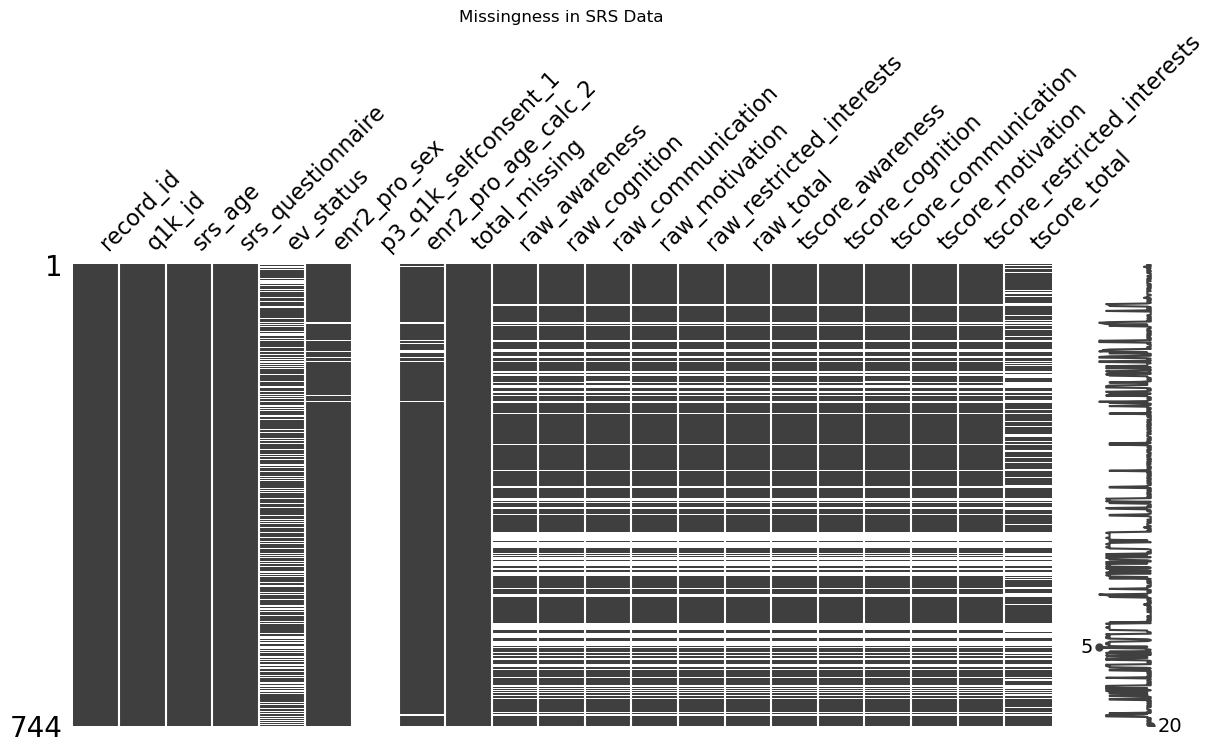

C:\Users\gabot\AppData\Local\Temp\ipykernel_11492\3190014284.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srs_df_clean[t_score_cols] = srs_df_clean[t_score_cols].apply(pd.to_numeric, errors='coerce')


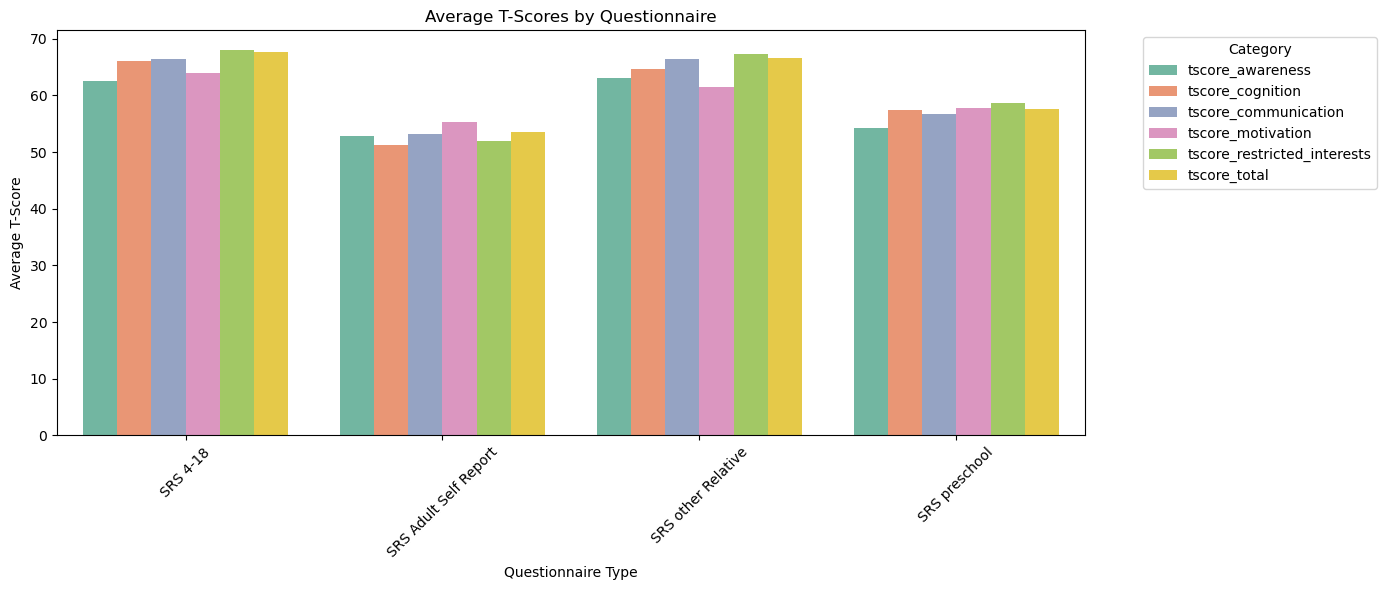

In [150]:
# Plot missingness in the cleaned SRS file using missingno
msno.matrix(srs_df_clean, figsize=(14, 6))
plt.title('Missingness in SRS Data')
plt.show()


# Calculate average t-scores for each questionnaire type
t_score_cols = [col for col in consolidated_columns if col.startswith('tscore_')]

# Convert t-score columns to numeric (in case they are object type)
srs_df_clean[t_score_cols] = srs_df_clean[t_score_cols].apply(pd.to_numeric, errors='coerce')

# Group by questionnaire and calculate mean for each t-score column
avg_tscore_by_questionnaire = srs_df_clean.groupby('srs_questionnaire')[t_score_cols].mean()

# Drop column with Nan values in srs_questionnaire
avg_tscore_by_questionnaire = avg_tscore_by_questionnaire.dropna()

# Melt the DataFrame to long format for seaborn
avg_tscore_by_questionnaire = avg_tscore_by_questionnaire.reset_index().melt(id_vars='srs_questionnaire', var_name='t_score', value_name='tscore_1')

# Convert questionnaire type to categorical for better ordering in the plot
avg_tscore_by_questionnaire['srs_questionnaire'] = pd.Categorical(avg_tscore_by_questionnaire['srs_questionnaire'], categories=sorted(avg_tscore_by_questionnaire['srs_questionnaire'].unique()), ordered=True)

# Set the order of the t-scores for plotting
avg_tscore_by_questionnaire['t_score'] = pd.Categorical(avg_tscore_by_questionnaire['t_score'], categories=t_score_cols, ordered=True)



# Plot average t-scores as bars using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_tscore_by_questionnaire.reset_index(), x='srs_questionnaire', y='tscore_1', hue='t_score', palette='Set2')
plt.title('Average T-Scores by Questionnaire')
plt.xlabel('Questionnaire Type')
plt.ylabel('Average T-Score')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [148]:
avg_tscore_by_questionnaire

,srs_questionnaire,t_score,tscore_1
0,SRS 4-18,tscore_awareness,62.502008
1,SRS Adult Self Report,tscore_awareness,52.906574
2,SRS other Relative,tscore_awareness,63.166667
3,SRS preschool,tscore_awareness,54.250000
4,SRS 4-18,tscore_cognition,66.012048
5,SRS Adult Self Report,tscore_cognition,51.186851
6,SRS other Relative,tscore_cognition,64.600000
7,SRS preschool,tscore_cognition,57.350000
8,SRS 4-18,tscore_communication,66.497992
9,SRS Adult Self Report,tscore_communication,53.256055


In [102]:
srs_df_clean.srs_questionnaire.value_counts()

SRS Adult Self Report    260
SRS 4-18                 248
                         210
SRS preschool             20
SRS other Relative         6
Name: srs_questionnaire, dtype: int64